Никишев И.О. 224-321

ПЗ2 Выбор параметров дискретизации сигнала

Цель

Ознакомиться с понятием дискретизация и научиться дискретизировать непрерывную функцию изображения.

2. Название выбранной матрицы фотоаппарата и ее характеристики: 144х96мм
(a) Функция создания сигнала в виде синусоиды с возможность
изменять частоту и сдвигать по фазе. Значения синусоиды в
интервале [0; 1].

1000


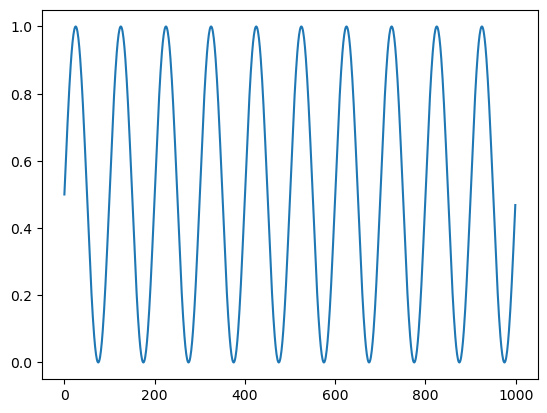

In [2]:
import numpy as np,matplotlib.pyplot as plt
def sine(length=10, resolution=100, shift = 0):
    """length - кол-во повторов, resolution - значений на 1 повтор, shift - смещение фазы (1 = 1 фаза)"""
    return (np.sin(np.arange(start = 2*shift*np.pi, stop = 2*np.pi*length + 2*shift*np.pi, step = (2*np.pi)/resolution))+1)/2

print(len(sine()))
plt.plot(sine())
plt.show()

(b) Функция, дискретизирующая сигнал с заданной частотой.

Изображение разбивается на 300 интервалов и занимает 144 мм. Частота дискретизации 144/300 = 0.48 мм

In [3]:
def discretize(image, rate=0.12, width_mm = 36):
    intervals = width_mm/rate #300
    rate = len(image)/intervals
    result=[]
    current = 0
    while True:
        try:
            result.append(image[int(current)])
            current+=rate
        except IndexError:  break
    return np.array(result)

(c) Функция, которая создает изображение из дискретизированного сигнала. 

In [4]:
def image(img):
    img=np.array([img]*len(img))
    import matplotlib.pyplot as plt
    plt.imshow(img)
def image2(img):
    img=np.array([img]*len(img))
    return img

3. Создать исходные сигналы с частотами 1/5𝑓𝑠, 1/3𝑓𝑠, 1/2 𝑓𝑠, 1𝑓𝑠, 1.41 · 𝑓𝑠, 2 · 𝑓𝑠, 3 · 𝑓𝑠 без сдвига по фазе и со сдвигом на 1 2 периода.

In [5]:
signals=[]
for i in [1/5, 1/3, 1/2, 1, 1.41, 2, 3]:
    for j in [0, 0.5]:
        signals.append(sine(length = 1/(0.12*(i)), shift=j))

Дискретизировать сигналы с полученными частотами со сдвигом и
без. Количество отсчетов задать не менее 300. Получить изображения дискретизированного сигнала (всего 14).

Изображения выведены в порядке 1/5𝑓𝑠, 1/3𝑓𝑠, 1/2 𝑓𝑠, 1𝑓𝑠, 1.41 · 𝑓𝑠, 2 · 𝑓𝑠, 3 · 𝑓𝑠. Слева - без сдвига, справа - сдвиг 0.5 по фазе

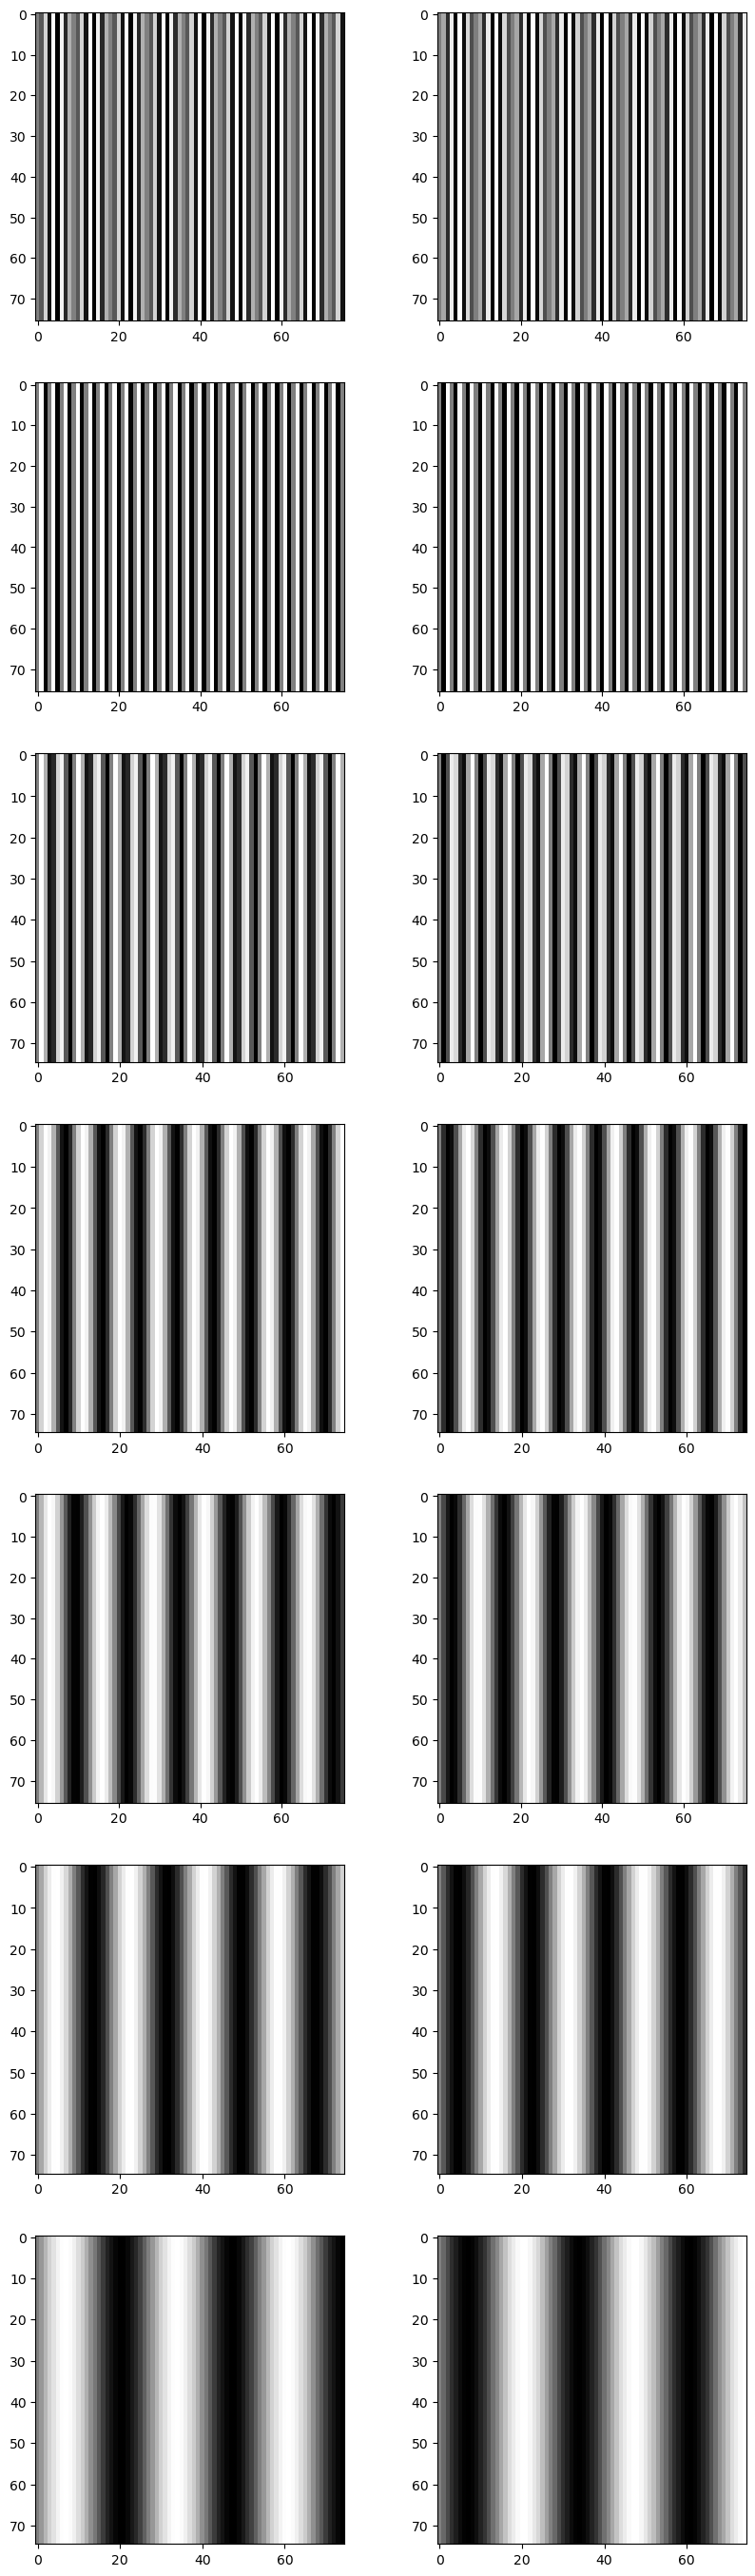

In [6]:
def task(signals=signals, rate=0.48):
    fig = plt.figure(figsize=(10, 70))
    for n, i in enumerate(signals):
        fig.add_subplot(14, 2, n+1)
        plt.imshow(image2(discretize(i, rate=rate)), cmap='gray')
task(rate=0.48)

Уменьшим частоту дискретизации с 0.48 до 0.24

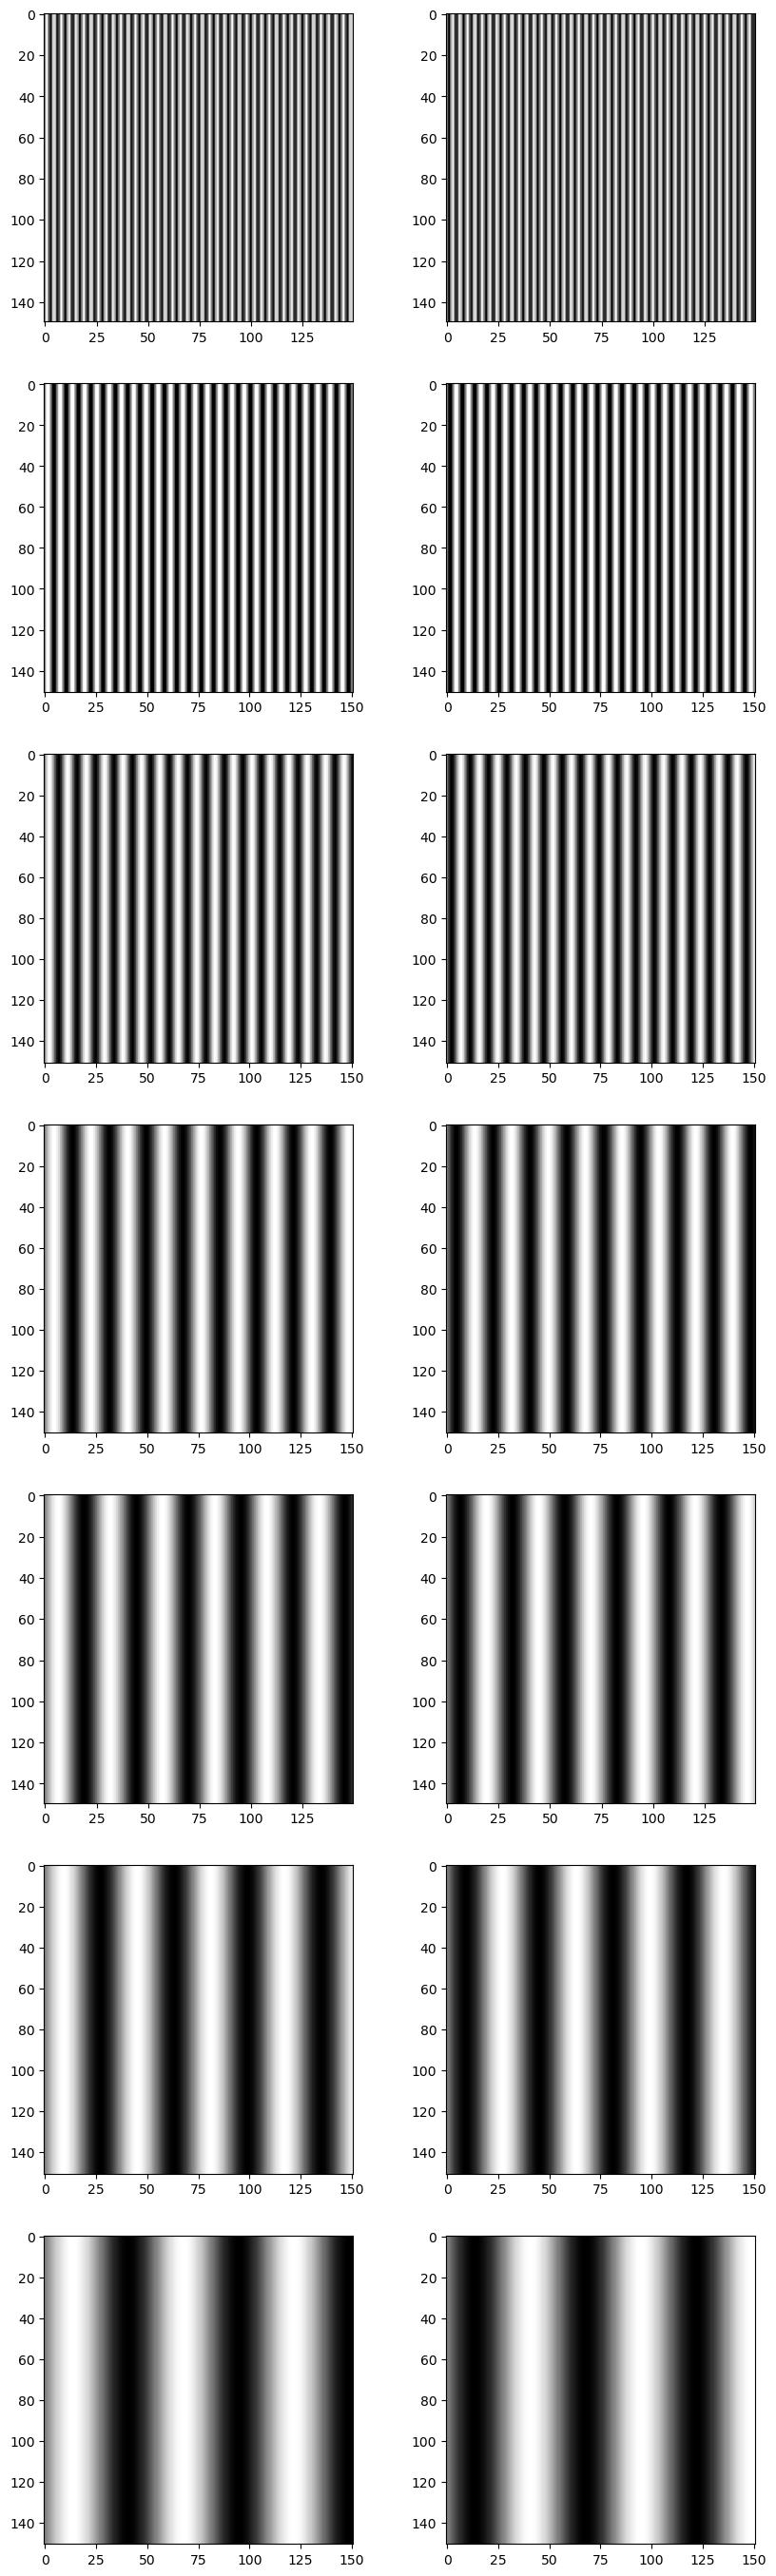

In [7]:
task(rate=0.24)

# Вывод

Частота дискретизации 0.48 недостаточна для корректного отображения сигнала 1/5𝑓𝑠. Для корректного отображения необходима частота дискретизации 0.24